## A basic fully-connected network (dense 1 input, 1 hidden, 1 output layer) to classify good or bad coffee

### Example from Coursera [Machine Learning Specialization](https://www.coursera.org/learn/advanced-learning-algorithms/home/week/1)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers
import  matplotlib.pyplot as plt

2022-07-03 16:05:36.496499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 16:05:36.496551: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

def plt_roast(X,Y):
    Y = Y.reshape(-1,)
    fig, ax = plt.subplots(1,1,)
    ax.scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', c='red', label="Good Roast" )
    ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o', facecolors='none', 
               edgecolors='#0D5BDC',linewidth=1,  label="Bad Roast")
    tr = np.linspace(175,260,50)
    ax.plot(tr, (-3/85) * tr + 21, color='#7030A0',linewidth=1)
    ax.axhline(y=12,color='#7030A0',linewidth=1)
    ax.axvline(x=175,color='#7030A0',linewidth=1)
    ax.set_title(f"Coffee Roasting", size=16)
    ax.set_xlabel("Temperature \n(Celsius)",size=12)
    ax.set_ylabel("Duration \n(minutes)",size=12)
    ax.legend(loc='upper right')
    plt.show()

(200, 2) (200, 1)


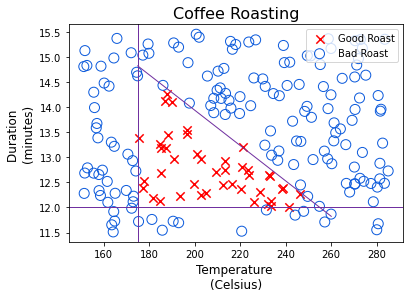

In [3]:
X_train, y_train = load_coffee_data()
print(X_train.shape, y_train.shape)
plt_roast(X_train, y_train)

Since `temperature` and `duration` are different physical measures, their values span on different scales. Thus, we must normalize them to the same scale. This action also results in faster back propagation during training.

In [4]:
norm_layer = layers.Normalization(axis=-1)
norm_layer.adapt(X_train)


2022-07-03 16:05:39.393214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-03 16:05:39.393309: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-03 16:05:39.393334: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nigelx-personal-laptop): /proc/driver/nvidia/version does not exist
2022-07-03 16:05:39.393706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
X_train_normed = norm_layer(X_train)
X_train_normed

<tf.Tensor: shape=(200, 2), dtype=float32, numpy=
array([[-0.8345551 , -0.6528792 ],
       [ 1.0323051 , -1.3851453 ],
       [ 0.3089391 ,  0.8716251 ],
       [-1.0835688 , -1.5154841 ],
       [-0.7894313 ,  0.6194935 ],
       [ 0.18112417, -1.1790283 ],
       [-0.25681356,  0.6615495 ],
       [-0.29007602,  0.5335373 ],
       [ 1.5498857 ,  0.7103532 ],
       [-0.39534125, -1.047197  ],
       [-0.54960555,  0.1006532 ],
       [ 1.2923743 ,  1.0382426 ],
       [-0.6435681 ,  1.5651861 ],
       [-0.12749763,  0.7482604 ],
       [-1.3561714 , -1.340383  ],
       [-1.0362518 ,  1.4242196 ],
       [ 0.57822186,  1.2993953 ],
       [ 0.45871606, -0.26986104],
       [ 0.02678081,  0.3926646 ],
       [ 1.1940966 , -0.15769024],
       [ 1.2958566 ,  0.46452886],
       [ 1.0834192 ,  0.05453626],
       [ 0.6211478 , -0.5091947 ],
       [ 0.04789595, -0.94450104],
       [-1.3781425 , -1.5741245 ],
       [ 0.65300936, -0.09301733],
       [ 1.3144168 ,  1.24958   ],
     

### Tensorflow implementation

In [6]:
class Model:
    def __init__(self):
        self.input = keras.Input(shape=(2,)) # omittable
        self.hidden = layers.Dense(units=3, activation="sigmoid", name='hidden')
        self.output = layers.Dense(units=1, activation="sigmoid", name='output')
    
    def init(self):
        return keras.models.Sequential([
            self.input,
            self.hidden,
            self.output
        ])

In [7]:
model = Model().init()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Check if model is correctly instantiated
W1, b1 = model.get_layer("hidden").get_weights()
W2, b2 = model.get_layer("output").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.9024596  -0.62006426 -0.8614861 ]
 [ 0.3925296   0.78105354  0.27869463]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 1.1397125 ]
 [-0.79746985]
 [-0.7670278 ]] 
b2(1,): [0.]


These weights (W1, W2) and biases (b1, b2) are randomly initiated. Fix tf.random.set_seed() to reproduce the same result. 

In [9]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01)
)

In [10]:
model.fit(X_train_normed, y_train, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6621
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6154
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5750
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5493
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5288
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5146
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5052
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4973
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4920
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4869
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4827
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4790
Epoch 13/1000
7/7 [==============================

In [11]:
X_test = np.array([
    [200, 13.9], # postive example
    [200, 17] # negative example
])
X_test_normed = norm_layer(X_test)


In [12]:
predictions = model.predict(X_test_normed)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 157ms/step
predictions = 
 [[6.448923e-01]
 [9.391779e-06]]


In [15]:
y_hat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{y_hat}")

decisions = 
[[1]
 [0]]


### Numpy implementation

In [21]:
from typing import Callable

In [22]:
def sigmoid(z):
    """
    z: input array or scalar
    """
    z = np.clip(z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [35]:
class DenseLayer:
    def __init__(self, weights, biases, activation: Callable):
        self.W = weights
        self.b = biases
        self.g = activation

    def __call__(self, input: np.ndarray):
        z = np.dot(self.W.T, input) + self.b
        # Also z = np.dot(input, self.W) + self.b
        return self.g(z)

Weights and biases here are are already trained from the above Tensorflow implementation

In [36]:
class NumpyModel:
    def __init__(self):
        self.hidden = DenseLayer(
            weights=np.array([[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]]),
            biases=np.array([-9.82, -9.28,  0.96]),
            activation=sigmoid
        ) # Matrix size (2x3)
        self.output = DenseLayer(
            weights=np.array([[-31.18], [-27.59], [-32.56]]),
            biases=np.array([15.41]),
            activation=sigmoid
        ) # Matrix size (3x1)
        
    def predict(self, input):
        z = self.hidden(input=input)
        z = self.output(input=z)
        return z

In [33]:
model = NumpyModel()

In [42]:
X_test = np.array([
    [200, 13.9],  # postive example
    [200, 17] # negative example
])

for sample in X_test:
    normed_sample = norm_layer(sample)  # remember to normalize
    pred = model.predict(normed_sample)
    y_hat = (pred >= 0.5).astype(int)
    print(f"X: {sample} \t y_hat: {y_hat} \t probability: {pred.item()}")

X: [200.   13.9] 	 y_hat: [[1]] 	 probability: 0.9719322875321041
X: [200.  17.] 	 y_hat: [[0]] 	 probability: 3.2897862618613913e-08


**Note that** Tensorflow supports batch prediction natively while numpy implementation interates through each sample. This is because of [vectorization.](https://www.coursera.org/learn/advanced-learning-algorithms/lecture/qkJy8/how-neural-networks-are-implemented-efficiently)